<a href="https://colab.research.google.com/github/SanjayShetty01/Backtesting/blob/main/Backtesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Load the Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import datetime as dt


### Load the Dataset

In [6]:
bankNiftyData = pd.read_excel('BankNiftyFutures_Data5Min.xlsx', sheet_name = 0, parse_dates=[['Date', 'Time']], )

### A Look into the Dataset

In [7]:
bankNiftyData.head()

,Date_Time,Ticker,Final Date format,Open 5,High 5,Low 5,Close 5,Volume 5,Year
0,2015-01-01 09:20:00,BANKNIFTY_F1,20150101,18861.3496,18867.9492,18793.0000,18808.3496,84825,2015
1,2015-01-01 09:25:00,BANKNIFTY_F1,20150101,18808.0000,18835.0000,18802.1992,18829.0000,40925,2015
2,2015-01-01 09:30:00,BANKNIFTY_F1,20150101,18826.9492,18833.4004,18820.0000,18826.0996,27000,2015
3,2015-01-01 09:35:00,BANKNIFTY_F1,20150101,18825.0508,18829.0996,18810.0000,18810.0000,18025,2015
4,2015-01-01 09:40:00,BANKNIFTY_F1,20150101,18805.0000,18808.9492,18775.0000,18803.9492,60100,2015


In [8]:
bankNiftyData.shape

(91737, 9)

In [9]:
bankNiftyData.describe()

,Final Date format,Open 5,High 5,Low 5,Close 5,Volume 5,Year
count,9.173700e+04,91737.000000,91737.000000,91737.000000,91737.000000,9.173700e+04,91737.000000
mean,2.017057e+07,22852.481723,22868.809964,22836.145490,22852.631275,5.531416e+04,2016.990952
std,1.413046e+04,4816.167946,4818.059589,4814.411349,4816.300957,6.066659e+04,1.412742
min,2.015010e+07,13449.900400,13559.900400,13406.400400,13445.000000,0.000000e+00,2015.000000
25%,2.016033e+07,18506.000000,18522.250000,18490.099600,18506.150400,1.916000e+04,2016.000000
50%,2.017063e+07,23525.800800,23533.199200,23518.000000,23526.599600,3.565000e+04,2017.000000
75%,2.018092e+07,26805.050800,26820.650400,26786.150400,26805.000000,6.888000e+04,2018.000000
max,2.019123e+07,32755.000000,32773.851600,32745.000000,32756.849600,1.580480e+06,2019.000000


In [10]:
bankNiftyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91737 entries, 0 to 91736
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date_Time          91737 non-null  datetime64[ns]
 1   Ticker             91737 non-null  object        
 2   Final Date format  91737 non-null  int64         
 3   Open 5             91737 non-null  float64       
 4   High 5             91737 non-null  float64       
 5   Low 5              91737 non-null  float64       
 6   Close 5            91737 non-null  float64       
 7   Volume 5           91737 non-null  int64         
 8   Year               91737 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 6.3+ MB


Converting the 5 Min time interval to 15 Min time interval. 

In [11]:
bankNiftyData = bankNiftyData.set_index("Date_Time")
bankNiftyData = bankNiftyData.groupby(pd.Grouper(freq = '15Min',closed='right',label='right')).agg({
                                              "Open 5": "first",
                                              "High 5": "max",
                                              "Low 5": "min",
                                              "Close 5": "last",
                                              "Volume 5": "sum"})

In [12]:
bankNiftyData.columns = ['Open', 'High', 'Low', 'Close', 'Volume']

In [13]:
bankNiftyData.head()

,Open,High,Low,Close,Volume
Date_Time,,,,,
2015-01-01 09:30:00,18861.3496,18867.9492,18793.0000,18826.0996,152750
2015-01-01 09:45:00,18825.0508,18829.9004,18775.0000,18821.0000,104675
2015-01-01 10:00:00,18821.0000,18850.0000,18820.0000,18838.9492,66825
2015-01-01 10:15:00,18835.0508,18858.5996,18830.6504,18836.4004,49100
2015-01-01 10:30:00,18835.6992,18848.0000,18828.5996,18830.0000,16600


Calculating VWAP fot the given Ticker (Bank Nifty)

More about [Bank Nifty](https://economictimes.indiatimes.com/investments-markets/seven-things-you-must-know-about-bank-nifty/slideshow/52291454.cms)

More about [VWAP](https://www.investopedia.com/terms/v/vwap.asp#:~:text=The%20volume%20weighted%20average%20price%20(VWAP)%20is%20a%20trading%20benchmark,and%20value%20of%20a%20security.)



In [14]:
def calculateVwap(data):
  data['TP'] = (data['High']+data['Low']+data['Close'])/3.0
  data['TradedValue']  = data['TP']*data['Volume']
  data['CumVolume'] = data['Volume'].cumsum()
  data['CumTradedValue'] = data['TradedValue'].cumsum()
  data['VWAP'] = data['CumTradedValue'] /data['CumVolume']
  return data

In [15]:
bankNifty = bankNiftyData.groupby(bankNiftyData.index.date).apply(calculateVwap)

In [16]:
bankNifty.head()

,Open,High,Low,Close,Volume,TP,TradedValue,CumVolume,CumTradedValue,VWAP
Date_Time,,,,,,,,,,
2015-01-01 09:30:00,18861.3496,18867.9492,18793.0000,18826.0996,152750,18829.016267,2.876132e+09,152750,2.876132e+09,18829.016267
2015-01-01 09:45:00,18825.0508,18829.9004,18775.0000,18821.0000,104675,18808.633467,1.968794e+09,257425,4.844926e+09,18820.728146
2015-01-01 10:00:00,18821.0000,18850.0000,18820.0000,18838.9492,66825,18836.316400,1.258737e+09,324250,6.103663e+09,18823.940744
2015-01-01 10:15:00,18835.0508,18858.5996,18830.6504,18836.4004,49100,18841.883467,9.251365e+08,373350,7.028799e+09,18826.300427
2015-01-01 10:30:00,18835.6992,18848.0000,18828.5996,18830.0000,16600,18835.533200,3.126699e+08,389950,7.341469e+09,18826.693462


In [17]:
bankNifty.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 175225 entries, 2015-01-01 09:30:00 to 2019-12-31 15:30:00
Freq: 15T
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Open            30723 non-null   float64
 1   High            30723 non-null   float64
 2   Low             30723 non-null   float64
 3   Close           30723 non-null   float64
 4   Volume          175225 non-null  int64  
 5   TP              30723 non-null   float64
 6   TradedValue     30723 non-null   float64
 7   CumVolume       175225 non-null  int64  
 8   CumTradedValue  30723 non-null   float64
 9   VWAP            30698 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 14.7 MB


In [18]:
bankNifty = bankNifty.reset_index()

A Plot of Closing price and the VWAP indicator over 2015 to 2019

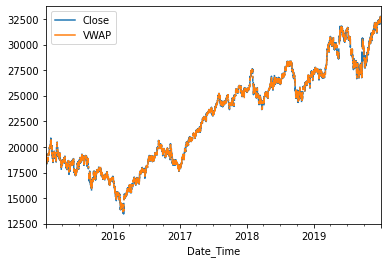

In [19]:
bankNifty.plot(x = 'Date_Time',y =['Close',"VWAP"])
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

In [20]:
bankNiftyData.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 175225 entries, 2015-01-01 09:30:00 to 2019-12-31 15:30:00
Freq: 15T
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Open    30723 non-null   float64
 1   High    30723 non-null   float64
 2   Low     30723 non-null   float64
 3   Close   30723 non-null   float64
 4   Volume  175225 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 13.0 MB


In [21]:
bankNifty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175225 entries, 0 to 175224
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Date_Time       175225 non-null  datetime64[ns]
 1   Open            30723 non-null   float64       
 2   High            30723 non-null   float64       
 3   Low             30723 non-null   float64       
 4   Close           30723 non-null   float64       
 5   Volume          175225 non-null  int64         
 6   TP              30723 non-null   float64       
 7   TradedValue     30723 non-null   float64       
 8   CumVolume       175225 non-null  int64         
 9   CumTradedValue  30723 non-null   float64       
 10  VWAP            30698 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(2)
memory usage: 14.7 MB


In [22]:
bankNifty.isna().sum()

Date_Time              0
Open              144502
High              144502
Low               144502
Close             144502
Volume                 0
TP                144502
TradedValue       144502
CumVolume              0
CumTradedValue    144502
VWAP              144527
dtype: int64

In [23]:
bankNifty.dropna(axis = 0, how = 'any', inplace = True)

In [24]:
bankNifty.isnull().values.any()

False

In [25]:
bankNifty.drop(columns= ['TP', 'TradedValue', 'CumVolume', 'CumTradedValue'], inplace= True)

In [26]:
bankNifty.head()

,Date_Time,Open,High,Low,Close,Volume,VWAP
0,2015-01-01 09:30:00,18861.3496,18867.9492,18793.0000,18826.0996,152750,18829.016267
1,2015-01-01 09:45:00,18825.0508,18829.9004,18775.0000,18821.0000,104675,18820.728146
2,2015-01-01 10:00:00,18821.0000,18850.0000,18820.0000,18838.9492,66825,18823.940744
3,2015-01-01 10:15:00,18835.0508,18858.5996,18830.6504,18836.4004,49100,18826.300427
4,2015-01-01 10:30:00,18835.6992,18848.0000,18828.5996,18830.0000,16600,18826.693462


In [27]:
bankNifty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30698 entries, 0 to 175224
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date_Time  30698 non-null  datetime64[ns]
 1   Open       30698 non-null  float64       
 2   High       30698 non-null  float64       
 3   Low        30698 non-null  float64       
 4   Close      30698 non-null  float64       
 5   Volume     30698 non-null  int64         
 6   VWAP       30698 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 1.9 MB


In [28]:
bankNifty.tail()

,Date_Time,Open,High,Low,Close,Volume,VWAP
175220,2019-12-31 14:30:00,32444.0000,32450.0000,32384.0000,32409.8496,96960,32417.227269
175221,2019-12-31 14:45:00,32409.8496,32459.0000,32401.1992,32426.0996,56520,32417.579405
175222,2019-12-31 15:00:00,32426.0996,32439.9492,32374.3008,32382.9492,114820,32416.498688
175223,2019-12-31 15:15:00,32380.6504,32407.6992,32376.6504,32382.0000,95220,32415.218904
175224,2019-12-31 15:30:00,32383.5000,32392.6992,32320.0000,32379.9004,259300,32409.520135


In [29]:
bankNifty.shape

(30698, 7)

In [30]:
bankNifty = bankNifty.reset_index()

In [35]:
len(bankNifty)

30698

In [45]:
bankNifty.iloc[30697]

index                     175224
Date_Time    2019-12-31 15:30:00
Open                     32383.5
High                     32392.7
Low                        32320
Close                    32379.9
Volume                    259300
VWAP                     32409.5
Name: 30697, dtype: object

In [36]:
bankNifty.tail()

,index,Date_Time,Open,High,Low,Close,Volume,VWAP
30693,175220,2019-12-31 14:30:00,32444.0000,32450.0000,32384.0000,32409.8496,96960,32417.227269
30694,175221,2019-12-31 14:45:00,32409.8496,32459.0000,32401.1992,32426.0996,56520,32417.579405
30695,175222,2019-12-31 15:00:00,32426.0996,32439.9492,32374.3008,32382.9492,114820,32416.498688
30696,175223,2019-12-31 15:15:00,32380.6504,32407.6992,32376.6504,32382.0000,95220,32415.218904
30697,175224,2019-12-31 15:30:00,32383.5000,32392.6992,32320.0000,32379.9004,259300,32409.520135


Creating a function called 'nearest_greater_value', the function would find the next closest highest number. 

In the context of this program the function would find the nearest closest highest number of the 'last_index', which are the index number of EOD trade time. Hence whenever we could use the function to find a possible Stop-Loss situation from the time a posiiton taken till the end of the day trade time. 

In [145]:
def nearest_greater_value(n, list):
  for k in list:
    if n <= k:


      return k

The function 'Sell_Buy' tried to implement the trading stradegy as mentioned in the task. 

In [245]:
def sell_buy(data):
  
  # intialising the lists
  
  datetime = []
  sigBuyPrice = []
  sigSellPrice = []
  sigShortSellPrice =[]
  sigCoverBuyPrice = []

  # creating a list containing all the index denoting the start of a new trading day

  index = data.index
  condition = data.Date_Time.dt.time == dt.time(9,30)
  first_index = index[condition]
  first_index = first_index.to_list()

  # creating a list containing all the index denoting the end of a trading a day
  index = data.index
  condition = data.Date_Time.dt.time == dt.time(15,15)
  last_index = index[condition]
  last_index = last_index.to_list()



  for i in range(len(data)):
    j = i+1

    y = nearest_greater_value(i, last_index)
    z = nearest_greater_value(j, last_index)

    # Setting up a condition, which would restart the sell and buy position 
    # on new trading day to zero. 

    if i in first_index:
      buyPosition = 0
      sellPosition = 0
      buyLongPosition = 0

  
    # Setting up a condition, which would only consider the time 9:30 AM to 
    # 3:30 PM

    if data.Date_Time.dt.time[i] > dt.time(9,30) and data.Date_Time.dt.time[i] < dt.time(15,00):
        
        # Setting up a buy signal when the Closing price is greater than VWAP indicator

        if data['Close'][i] > data['VWAP'][i]:
            datetime.append(data['Date_Time'][i])
            sigBuyPrice.append(data['Close'][i])
            sigSellPrice.append(np.nan)
            sigShortSellPrice.append(np.nan)
            sigCoverBuyPrice.append(np.nan)
            buyPosition += 1
        
        # Setting up a sell signal when the Closing price is lesser than the VWAP Indicator

        elif data['Close'][i] < data['VWAP'][i]:
            datetime.append(data['Date_Time'][i])
            sigShortSellPrice.append(data['Close'][i])
            sigBuyPrice.append(np.nan)
            sigSellPrice.append(np.nan)
            sigCoverBuyPrice.append(np.nan)
            sellPosition += 1

        # setting up a Long-buy postion when the Close price the second candle is
        # above VWAP. The Long-buy would be initialed at one tick above the Candle high

        elif data['Close'][j] > data['VWAP'][j]:
            if data.Date_Time.dt.time[j] < dt.time(15,00): 
              if j < (len(data)-1):
                datetime.append(data['Date_Time'][j])
                sigBuyPrice.append((data['High'][j])+0.05)
                sigSellPrice.append(np.nan)
                sigCoverBuyPrice.append(np.nan)
                sigShortSellPrice.append(np.nan)
                buyLongPosition += 1
                
                # Creating a StopLoss condition

                if buyLongPosition > 0:

                  for h in range(j,z):
                    if ((data['Low'][h])+0.05) > data['High'][j]:
                        datetime.append(data['Date_Time'][h])
                        sigSellPrice.append((data['Close'][h]))
                        sigBuyPrice.append(np.nan)
                        sigShortSellPrice.append(np.nan)
                        sigCoverBuyPrice.append(np.nan)

        else:
            datetime.append(data['Date_Time'][i])
            sigBuyPrice.append(np.nan)
            sigSellPrice.append(np.nan)
            sigShortSellPrice.append(np.nan)
            sigCoverBuyPrice.append(np.nan)

    # Exiting all the trade at 3:15 PM
    elif data.Date_Time.dt.time[i] == dt.time(15,15):
      if buyPosition > 0:
        datetime.append(data['Date_Time'][i])
        sigSellPrice.append((data['Close'][i])*buyPosition)
        sigBuyPrice.append(np.nan)
        sigCoverBuyPrice.append(np.nan)
        sigShortSellPrice.append(np.nan)

      if sellPosition > 0:
        datetime.append(data['Date_Time'][i])
        sigCoverBuyPrice.append((data['Close'][i])*sellPosition)
        sigSellPrice.append(np.nan)
        sigBuyPrice.append(np.nan)
        sigShortSellPrice.append(np.nan)

      if buyLongPosition > 0:
        datetime.append(data['Date_Time'][i])
        sigSellPrice.append((data['Close'][i])*buyLongPosition)
        sigBuyPrice.append(np.nan)
        sigShortSellPrice.append(np.nan)
        sigCoverBuyPrice.append(np.nan)



  return (datetime,sigBuyPrice, sigSellPrice, sigShortSellPrice, sigCoverBuyPrice)

In [246]:
data_sell_buy = sell_buy(bankNifty)

In [206]:
data_sell_df = pd.DataFrame(data_sell_buy)

In [207]:
data_sell_buy_df = data_sell_df.T #  Taking the transpose 

In [208]:
data_sell_buy_df.columns.values

array([0, 1, 2, 3, 4])

In [209]:
data_sell_buy_df.columns= ['Date_Time','Buy_Price','Sell_Price', 'Short_Sell_Price', 'Cover_Buy_Price']

In [210]:
data_sell_buy_df

,Date_Time,Buy_Price,Sell_Price,Short_Sell_Price,Cover_Buy_Price
0,2015-01-01 09:45:00,18821,NaN,NaN,NaN
1,2015-01-01 10:00:00,18838.9,NaN,NaN,NaN
2,2015-01-01 10:15:00,18836.4,NaN,NaN,NaN
3,2015-01-01 10:30:00,18830,NaN,NaN,NaN
4,2015-01-01 10:45:00,18829.2,NaN,NaN,NaN
...,...,...,...,...,...
27949,2019-12-31 14:15:00,32444.9,NaN,NaN,NaN
27950,2019-12-31 14:30:00,NaN,NaN,32409.8,NaN
27951,2019-12-31 14:45:00,32426.1,NaN,NaN,NaN
27952,2019-12-31 15:15:00,NaN,388584,NaN,NaN


In [211]:
data_sell_buy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27954 entries, 0 to 27953
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date_Time         27954 non-null  datetime64[ns]
 1   Buy_Price         13548 non-null  object        
 2   Sell_Price        1136 non-null   object        
 3   Short_Sell_Price  12167 non-null  object        
 4   Cover_Buy_Price   1103 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 1.1+ MB


### Visualization 

In [212]:
data_copy = pd.merge(bankNifty, data_sell_buy_df, on = 'Date_Time')

In [213]:
data_copy.head()

,index,Date_Time,Open,High,Low,Close,Volume,VWAP,Buy_Price,Sell_Price,Short_Sell_Price,Cover_Buy_Price
0,1,2015-01-01 09:45:00,18825.0508,18829.9004,18775.0000,18821.0000,104675,18820.728146,18821,NaN,NaN,NaN
1,2,2015-01-01 10:00:00,18821.0000,18850.0000,18820.0000,18838.9492,66825,18823.940744,18838.9,NaN,NaN,NaN
2,3,2015-01-01 10:15:00,18835.0508,18858.5996,18830.6504,18836.4004,49100,18826.300427,18836.4,NaN,NaN,NaN
3,4,2015-01-01 10:30:00,18835.6992,18848.0000,18828.5996,18830.0000,16600,18826.693462,18830,NaN,NaN,NaN
4,5,2015-01-01 10:45:00,18830.0000,18841.1504,18825.0000,18829.1992,14175,18826.871989,18829.2,NaN,NaN,NaN


In [214]:
plt.figure(figsize=(350,100))
plt.plot(data_copy['Close'],label = 'Bank Nifty')
plt.plot(data_copy['VWAP'], label = 'VWAP')
plt.scatter(data_copy.index, data_copy['Buy_Price'], label = 'Buy Price', marker = '^', color = 'Green')
plt.scatter(data_copy.index, data_copy['Sell_Price'], label = 'Sell Price', marker = 'v', color = 'Red')
plt.ylim(0,35000)


(0.0, 35000.0)

### Questions

1. Calculate the overall profit and loss

In [215]:
data_sell_buy_df.columns.values

array(['Date_Time', 'Buy_Price', 'Sell_Price', 'Short_Sell_Price',
       'Cover_Buy_Price'], dtype=object)

In [216]:
dataSeg_Year = data_sell_buy_df.groupby(data_sell_buy_df.Date_Time.dt.year)['Buy_Price', 'Sell_Price', 'Short_Sell_Price',
       'Cover_Buy_Price'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [218]:
dataSeg_day = data_sell_buy_df.groupby(data_sell_buy_df.Date_Time.dt.date)['Buy_Price', 'Sell_Price', 'Short_Sell_Price',
       'Cover_Buy_Price'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [220]:
dataSeg_Year['Profit/Loss'] = ((dataSeg_Year['Sell_Price'] - dataSeg_Year['Buy_Price'])+ (dataSeg_Year['Short_Sell_Price'] - dataSeg_Year['Cover_Buy_Price']))

In [221]:
dataSeg_day['Profit/Loss'] = ((dataSeg_day['Sell_Price'] - dataSeg_day['Buy_Price'])+ (dataSeg_day['Short_Sell_Price'] - dataSeg_day['Cover_Buy_Price']))

#### The Segregated Profit and Loss (Year-wise)

In [223]:
dataSeg_Year.head()

,Buy_Price,Sell_Price,Short_Sell_Price,Cover_Buy_Price,Profit/Loss
Date_Time,,,,,
2015,4.673485e+07,4.673967e+07,4.743357e+07,4.738005e+07,58338.3534
2016,4.714726e+07,4.715934e+07,4.369517e+07,4.369320e+07,14047.2418
2017,6.666079e+07,6.668612e+07,5.241932e+07,5.241913e+07,25518.3420
2018,7.221587e+07,7.227574e+07,6.169565e+07,6.166591e+07,89618.2664
2019,7.832258e+07,7.836275e+07,7.131926e+07,7.124393e+07,115508.8392


#### The Segregated Profit and Loss (Day-wise)

In [224]:
dataSeg_day.head()

,Buy_Price,Sell_Price,Short_Sell_Price,Cover_Buy_Price,Profit/Loss
Date_Time,,,,,
2015-01-01,396081.2988,396858.0000,0.0000,0.000,776.7012
2015-01-02,403112.5000,403221.0000,0.0000,0.000,108.5000
2015-01-05,115350.7500,114930.3048,287522.2480,287325.762,-223.9592
2015-01-06,0.0000,0.0000,393886.0468,388710.000,5176.0468
2015-01-07,92612.0996,91850.0000,294611.3496,293920.000,-70.7500


In [243]:
BestYear = dataSeg_Year['Profit/Loss'].idxmax()
print('Best Performing Year is', BestYear)

Best Performing Year is 2019


In [234]:
Total = dataSeg_day['Profit/Loss'].sum()
print(f'The Total Profit from the given Algo-Trading strategy is',Total, 'Rupees')

The Total Profit from the given Algo-Trading strategy is 303031.0427999975 Rupees
